In [60]:
#importing packages
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import ggplot, geom_boxplot, geom_density, geom_bar, geom_point, aes



In [4]:
#Part one: Data Exploration
#Importing data
Data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
Data.head()
#first thing I notice is that Sex, and smoker will need to be dummified 

Data["sex"].value_counts()
#Only male and female recorded, no NA
Data["smoker"].value_counts()
#Only yes and no, no NA
Data.describe()
Data


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


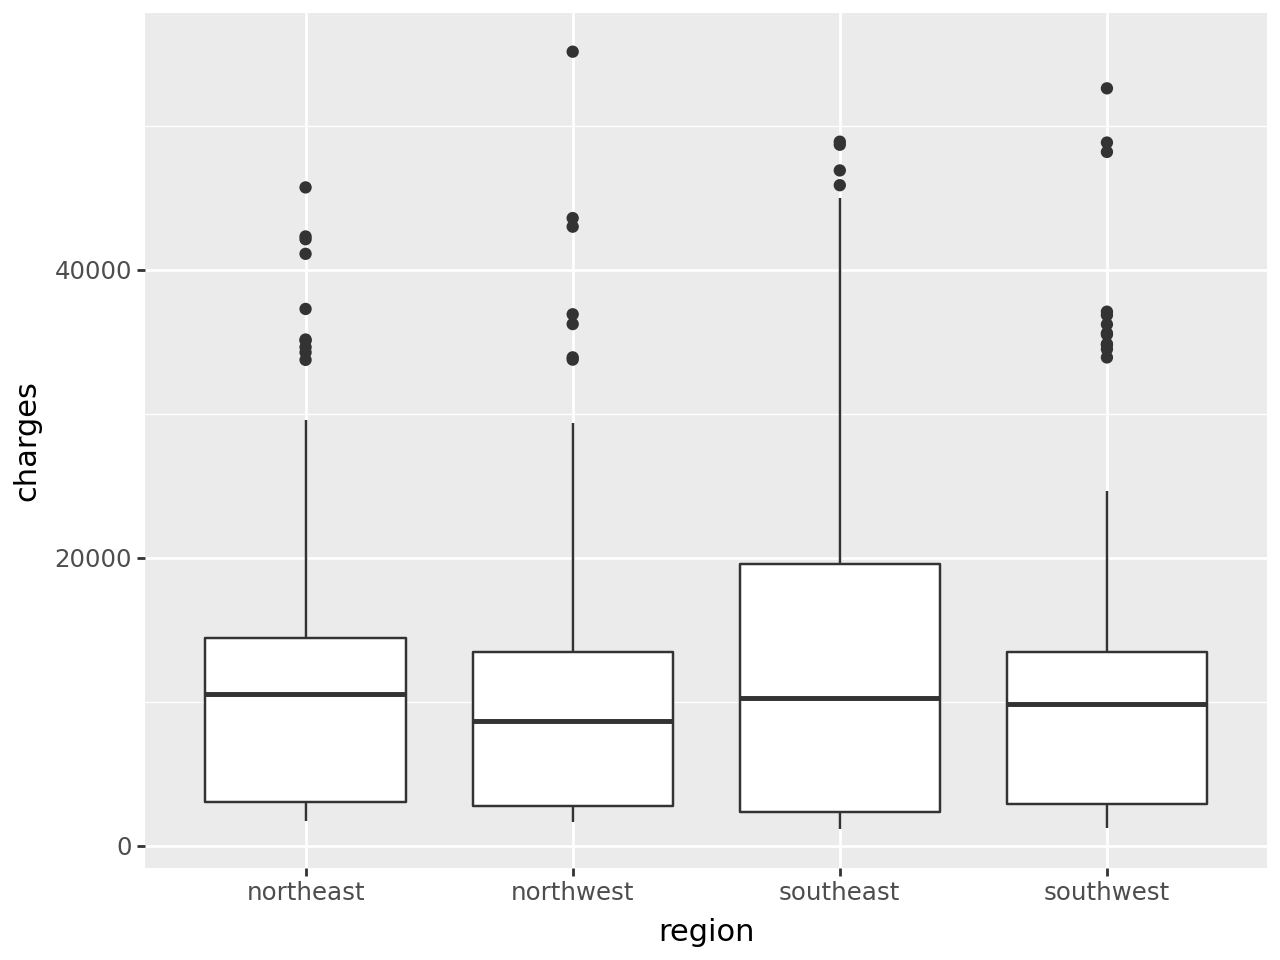

In [18]:
(ggplot(Data, aes(x = "region", y = "charges")) + geom_boxplot())

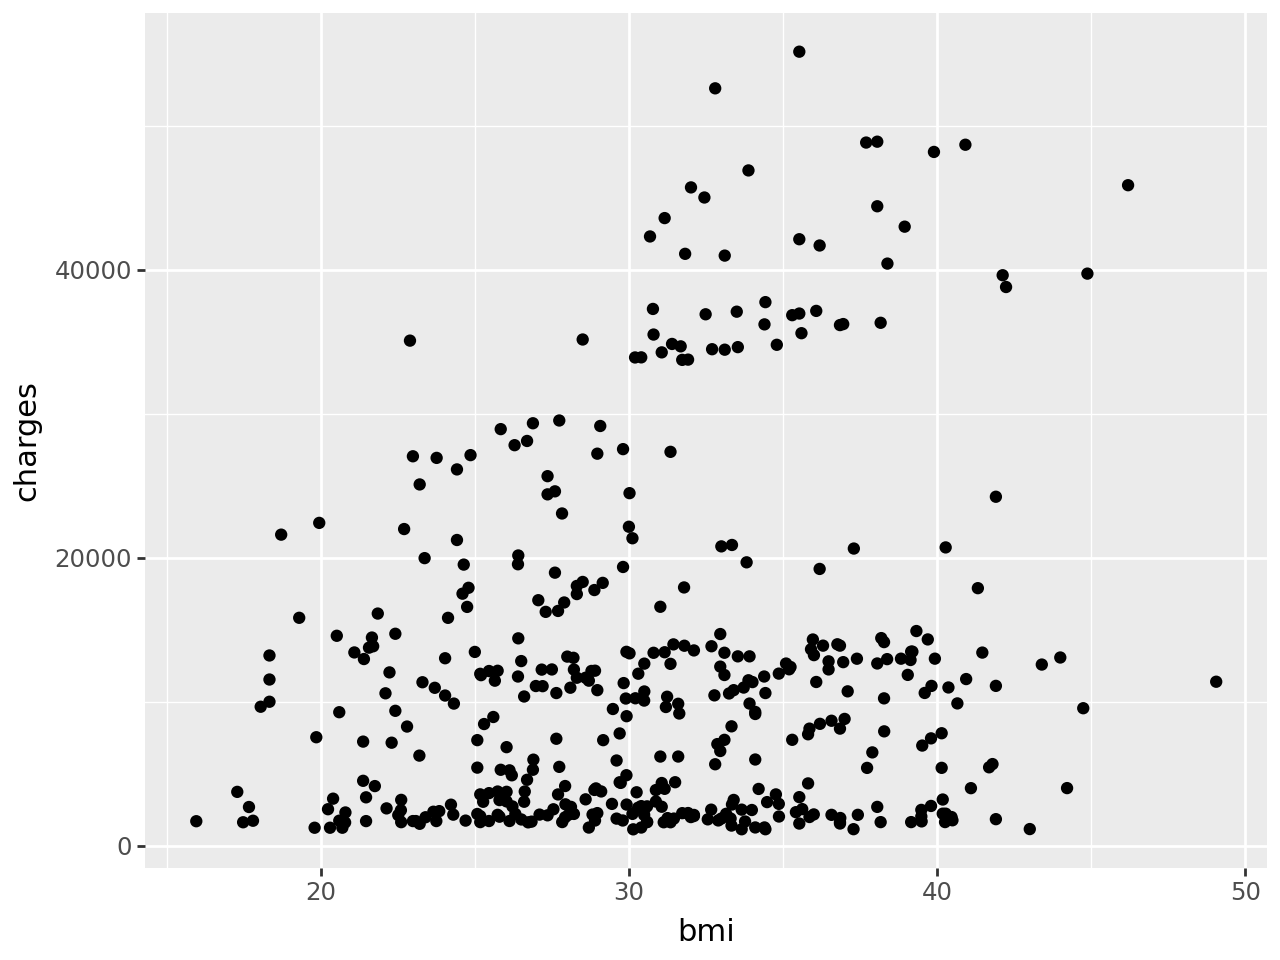

In [22]:
(ggplot(Data, aes(x= "bmi", y = "charges")) + geom_point())

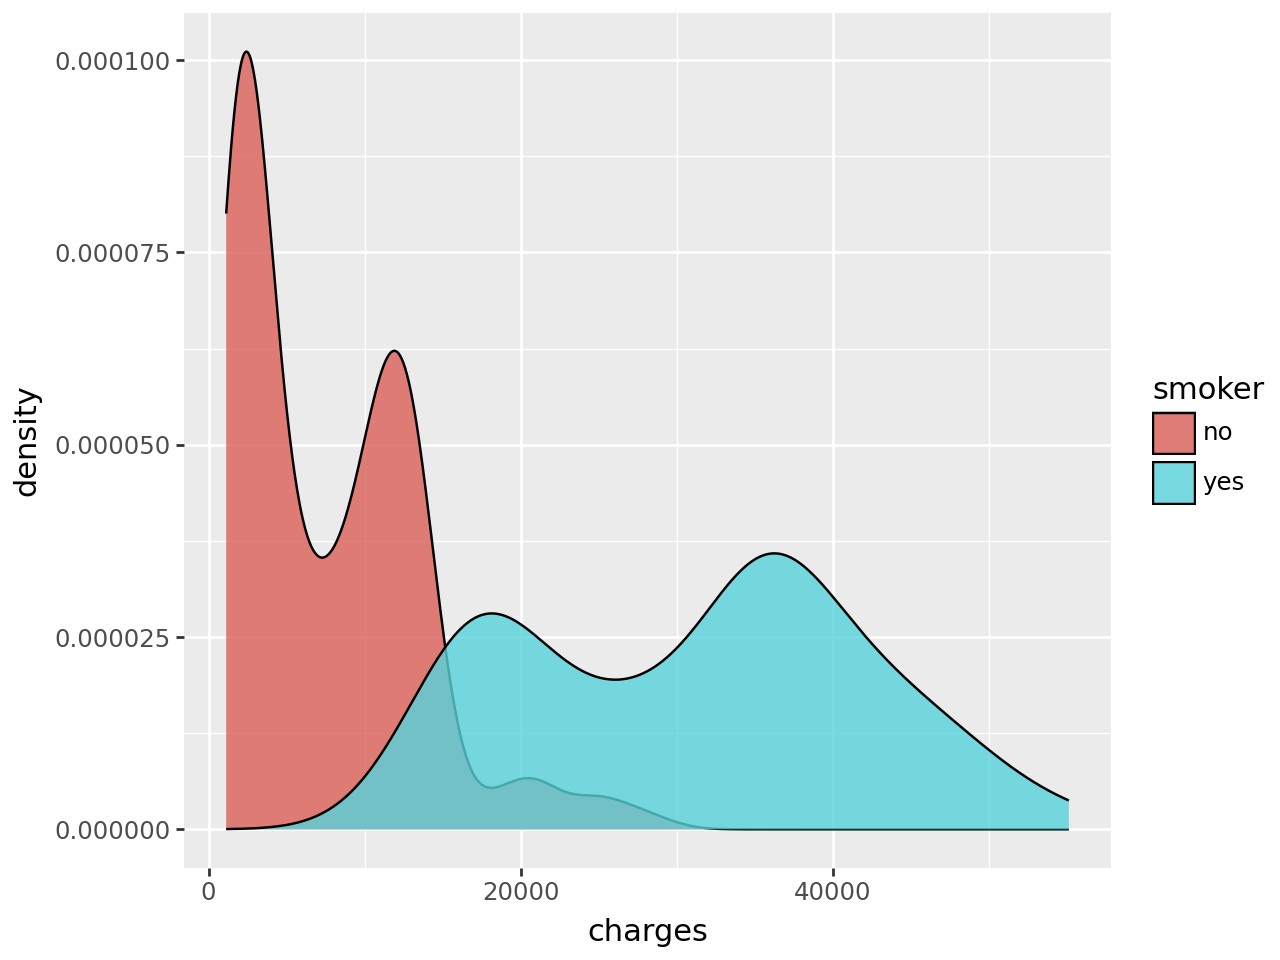

In [27]:
(ggplot(Data, aes(x= "charges", fill = "smoker")) + geom_density(alpha = 0.8))

Non smokers seem to have a much lower density of charges

**Simple Linear Models**


In [31]:
#Making X and y, test and train splits

X = Data[["age", "bmi", "smoker", "sex", "region"]]
y = Data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

Model 1:
***age as predictor for charges***

In [61]:
#preprocessing
ct1 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model1_pipeline = Pipeline(
    [("preprocessing", ct1),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model1 = model1_pipeline.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [62]:
#coeffecient estimates
model1.named_steps["linear_regression"].coef_
#The coeffecient of 231.42 means that according to this model, with every year increase of age, there is an average of 231.42 dollars in insurance charges


array([231.42606088])

In [63]:
#r2 values
r2_score(y_test, y_pred_model1)
#0.0911

0.09110501629750123

In [64]:
#MSE 
mse_test1 = mean_squared_error(y_test, y_pred_model1)
mse_train1 = mean_squared_error(y_train, model1.predict(X_train))
print(mse_test1, mse_train1)

127119498.1371271 126622085.39202513
127119498.1371271 126622085.39202513


The r2 score adn MSE suggest the fit for these models is very, very bad

Model 2:
***age and sex as predictor for charges***

In [67]:
#preprocessing
ct2 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["sex"]),
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model2_pipeline = Pipeline(
    [("preprocessing", ct2),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model2 = model2_pipeline.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)


C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [52]:
# ct2.fit_transform(X_train)

In [68]:
#coeffecient estimates
model2.named_steps["linear_regression"].coef_
#The coeffecients of 221.45, and 231.23 with this model mean that if someone is a male they have on average 221 more dollars of insurance charges,
#  and with every year increase of age, there is an average of 231 dollars in insurance charge

array([221.43569214, 231.23021427])

In [69]:
#r2 values
r2_score(y_test, y_pred_model2)
#0.0925

0.09254990866027213

In [70]:
#MSE 
mse_test2 = mean_squared_error(y_test, y_pred_model2)
mse_train2 = mean_squared_error(y_train, model2.predict(X_train))
print(mse_test2, mse_train2)

126917413.19297944 126609851.43054874
126917413.19297944 126609851.43054874


Model 3:
***age and smoker as predictor for charges***

In [71]:
#preprocessing
ct3 = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output= False, drop = "first"), ["smoker"]),
        ("keep", FunctionTransformer(None), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model3_pipeline = Pipeline(
    [("preprocessing", ct3),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model3 = model3_pipeline.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)

C:\Users\Davis\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [72]:
#coeffecient estimates
model3.named_steps["linear_regression"].coef_
#The coeffecients of 24219.6, and 240.36 with this model mean that if someone is a male they have on average 24219 more dollars of insurance charges,
#  and with every year increase of age, there is an average of 240 dollars in insurance charge

array([24219.67643711,   240.36522657])

In [74]:
#r2 values
r2_score(y_test, y_pred_model3)
#0.75

0.750845835490625

In [75]:
#MSE 
mse_test3 = mean_squared_error(y_test, y_pred_model3)
mse_train3 = mean_squared_error(y_train, model3.predict(X_train))
print(mse_test3, mse_train3)

34847097.76060775 33444441.587768946
34847097.76060775 33444441.587768946


The third predictive model seems to be by far the best predictive model for this dataset. The R squared value is much better than the first and second models (.75 compared to .091, and .093 respectively). The MSE on both the test and train data is also much better. The train and test MSE are also both trending towards 0, which inidcates there is not overfitting

**Multiple Linear Models**

Model 4:
***age and bmi as predictors for charges***

In [90]:
#preprocessing
ct4 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]) #standardize the predictor variables so we can compare their effect
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model4_pipeline = Pipeline(
    [("preprocessing", ct4),
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model4 = model4_pipeline.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)


In [81]:
# ct4.fit_transform(X_train)

In [77]:
#coeffecient estimates
model4.named_steps["linear_regression"].coef_
#The coeffecients of 3596, and 1762 with this model mean that for every standard deviation increase in age
#  there is an average of 3596 more insurance charges and 
#  and with every year increase of age, there is an average of 240 dollars in insurance charge

array([3596.66090812, 1762.35671276])

In [83]:
#r2 values
r2_score(y_test, y_pred_model4)
#0.109

0.10958154956678634

In [88]:
#MSE 
mse_test4 = mean_squared_error(y_test, y_pred_model4)
mse_train4 = mean_squared_error(y_train, model4.predict(X_train))
print(mse_test4, mse_train4)

124535340.80473913 123551857.63100733
124535340.80473913 123551857.63100733


-2584157.332387969

The r squared and MSE values are better than the values from model 1

Model 4
***age and age^2 as predictors***

In [91]:
#preprocessing
ct5 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age"])
    ],
    remainder= "drop"
).set_output(transform= "pandas")

#pipeline
model5_pipeline = Pipeline(
    [("preprocessing", ct5),
    ("polynomial", PolynomialFeatures(degree= 2, include_bias= False)), 
    ("linear_regression", LinearRegression())]
).set_output(transform= "pandas")
model5 = model5_pipeline.fit(X_train, y_train)
y_pred_model5 = model5.predict(X_test)


In [93]:
model5.named_steps["linear_regression"].coef_

array([3760.43231095,  138.93912707])

In [94]:
#r2 values
r2_score(y_test, y_pred_model5)
#0.089

0.08985155456747873